In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import datetime

import gym
import trading_env

import os
import agent 
from os import __file__

In [2]:
env_trading = gym.make('test_trading-v0')
NUM_EP = 100
date = datetime.datetime(2017, 5, 1, 0, 0)

Loading historical data file


## The Goal
Have a better cumulated reward and final portfolio value than the three following agents:
- The "holder" (action = 1)
- The "All out" (action = -1)
- The "I have no idea what I am doing" (random action)

These can be found at the end of this notebook

# The Agent

In [3]:
agent = agent.StochasticPolicyGradientAgent(env_trading, learning_rate = 1e-4)

In [4]:
rewards_plot = []
portfolio = []
for i in range(NUM_EP):
    state = env_trading.reset(date=date)
    state = np.reshape(state,200)
    total_reward = 0
    
    while(True):
        action = agent.act([state])
        state, reward, done, _ = env_trading.step(action)
        state = np.reshape(state,200)
        agent.store_step(action, state, reward)
        total_reward += reward
        if done:
            rewards_plot.append(total_reward)
            portfolio.append(env_trading.portfolio_value)
            print("Episode: {}, Total reward: {}".format(i,total_reward))
            break
    agent.train()


Episode: 0, Total reward: 1.2404275233606699
Episode: 1, Total reward: 1.1905571614288182
Episode: 2, Total reward: 1.227087876386796
Episode: 3, Total reward: 1.1462696036505013
Episode: 4, Total reward: 1.1290740868684328
Episode: 5, Total reward: 1.1855799168667187
Episode: 6, Total reward: 1.25025437240725
Episode: 7, Total reward: 1.1699492737544774
Episode: 8, Total reward: 1.2694905672223284
Episode: 9, Total reward: 1.2700650705430883
Episode: 10, Total reward: 1.0147227377953456
Episode: 11, Total reward: 1.1657041339287106
Episode: 12, Total reward: 1.1503248842648155
Episode: 13, Total reward: 1.2402168818094885
Episode: 14, Total reward: 1.3097495024556944
Episode: 15, Total reward: 1.1707127961725015
Episode: 16, Total reward: 1.168716647998757
Episode: 17, Total reward: 1.1523495100709555
Episode: 18, Total reward: 1.2132185317151523
Episode: 19, Total reward: 1.272773250657936
Episode: 20, Total reward: 1.241437541999163
Episode: 21, Total reward: 1.2096538350714952
Epis

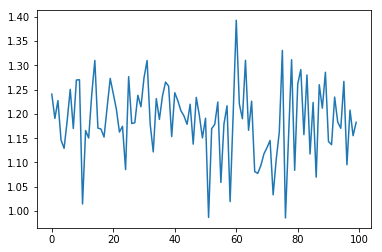

In [5]:
plt.plot(rewards_plot)
plt.show()

# Holder

In [ ]:
rewards_plot = []
portfolio = []
for i in range(NUM_EP):
    state = env_trading.reset(date=date)
    state = np.reshape(state,200)
    total_reward = 0
    
    while(True):
        action = 1.0 #Holder agent
        state, reward, done, _ = env_trading.step(action)
        state = np.reshape(state,200)
        total_reward += reward
        if done:
            rewards_plot.append(total_reward)
            portfolio.append(env_trading.portfolio_value)
            print("Episode: {}, Total reward: {}".format(i,total_reward))
            break
plt.plot(rewards_plot)
plt.show()



# Random

In [5]:
rewards_plot = []
portfolio = []
for i in range(NUM_EP):
    state = env_trading.reset(date=date)
    state = np.reshape(state,200)
    total_reward = 0
    
    while(True):
        action = env_trading.action_space.sample()
        state, reward, done, _ = env_trading.step(action)
        state = np.reshape(state,200)
        total_reward += reward
        if done:
            rewards_plot.append(total_reward)
            portfolio.append(env_trading.portfolio_value)
            print("Episode: {}, Total reward: {}".format(i,total_reward))
            break
plt.plot(rewards_plot)
plt.show()


Episode: 0, Total reward: [ 0.62008023]
Episode: 1, Total reward: [ 0.49847746]
Episode: 2, Total reward: [ 0.56291807]
Episode: 3, Total reward: [ 0.74062562]
Episode: 4, Total reward: [ 0.32204434]
Episode: 5, Total reward: [ 0.93102187]
Episode: 6, Total reward: [ 0.94741434]
Episode: 7, Total reward: [ 0.92231148]
Episode: 8, Total reward: [ 0.87327564]
Episode: 9, Total reward: [ 0.86952233]
Episode: 10, Total reward: [ 0.58622599]
Episode: 11, Total reward: [ 0.57257766]
Episode: 12, Total reward: [ 0.46953037]
Episode: 13, Total reward: [ 0.71862]
Episode: 14, Total reward: [ 0.4223353]
Episode: 15, Total reward: [ 0.46464601]
Episode: 16, Total reward: [ 0.92783493]
Episode: 17, Total reward: [ 0.71605098]
Episode: 18, Total reward: [ 0.77137607]


KeyboardInterrupt: 

# All out

In [ ]:
rewards_plot = []
portfolio = []
for i in range(NUM_EP):
    state = env_trading.reset(date=date)
    state = np.reshape(state,200)
    total_reward = 0
    
    while(True):
        action = -1.0
        state, reward, done, _ = env_trading.step(action)
        state = np.reshape(state,200)
        total_reward += reward
        if done:
            rewards_plot.append(total_reward)
            portfolio.append(env_trading.portfolio_value)
            print("Episode: {}, Total reward: {}".format(i,total_reward))
            break
plt.plot(rewards_plot)
plt.show()